In [22]:
# Print the current working directory. sys.path.append works with relative paths, so this is useful to know.
import os
print(os.getcwd())

c:\Users\pablo\Documents\GitHub\2d-geometry-optimization-\files


In [1]:
import sys
sys.path.append('../drlfoil/')

In [2]:
import gymnasium as gym
import drlfoil
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

In [16]:
env = gym.make('AirfoilEnv-v0', n_params=10, max_steps=4, scale_actions = 0.4, airfoil_seed = [0.1*np.ones(10), -0.1*np.ones(10), 0.0],
                    delta_reward=False, cl_reward = True, cl_reset = 0.9, efficiency_param = 1, cl_wide = 20, render_mode="human",)
model = PPO.load("logmodels/150424/15042024_ClTargetAuto_256_256_AntiNose.zip", env=env)
#model = PPO.load("16042024_NewRewardCl_4_DeltaReward", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [3]:
# Evaluate the agent
# NOTE: If you use wrappers with your environment that modify rewards,
#       this will be reflected here. To evaluate with original rewards,
#       wrap environment in a "Monitor" wrapper before other wrappers.
mean_reward, std_reward = evaluate_policy(model, env=env, n_eval_episodes=15, deterministic=True)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

c:\Users\pablomaga\Documents\GitHub\DRLFoil\venv\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward:579.87 +/- 255.06


In [17]:
# Enjoy trained agent
vec_env = model.get_env()
obs, _ = env.reset()

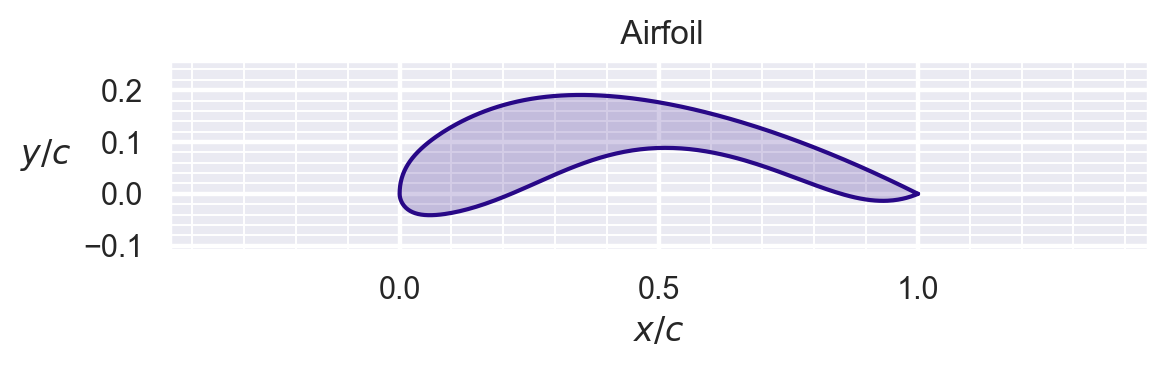

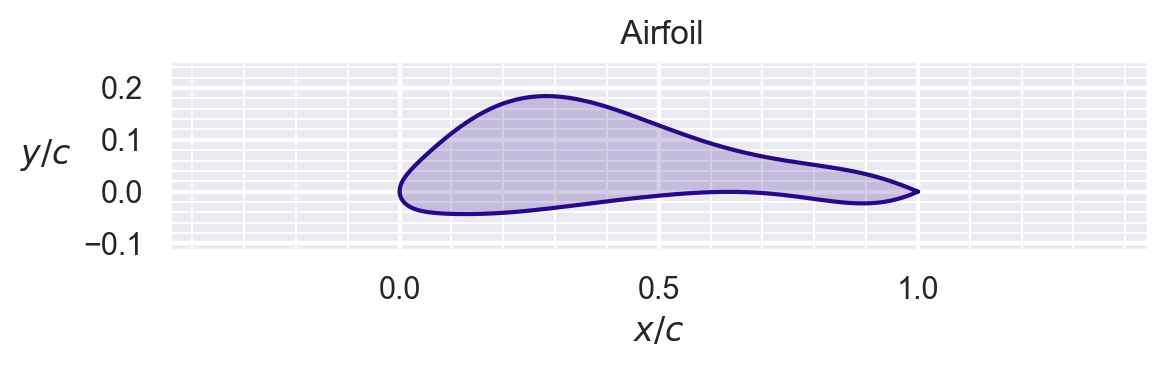

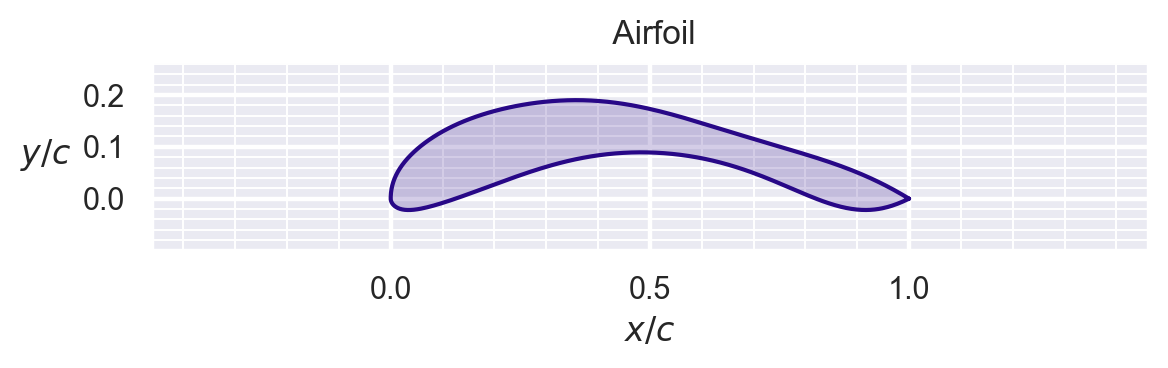

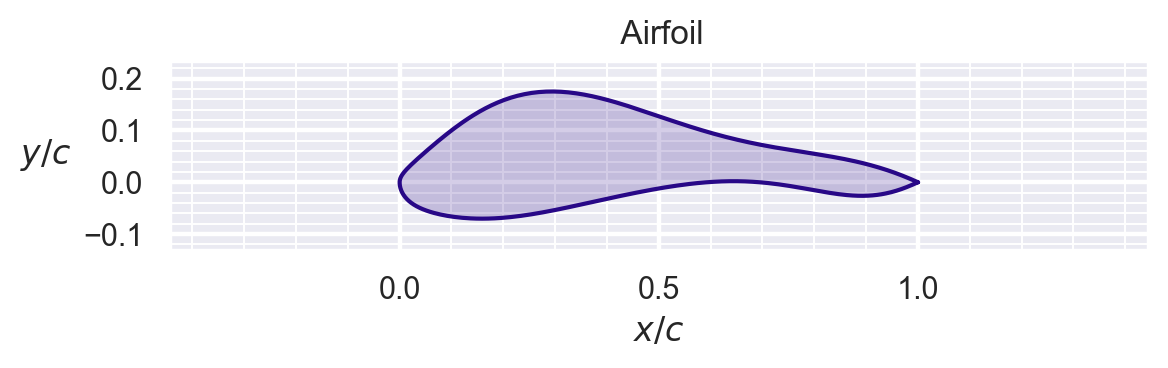

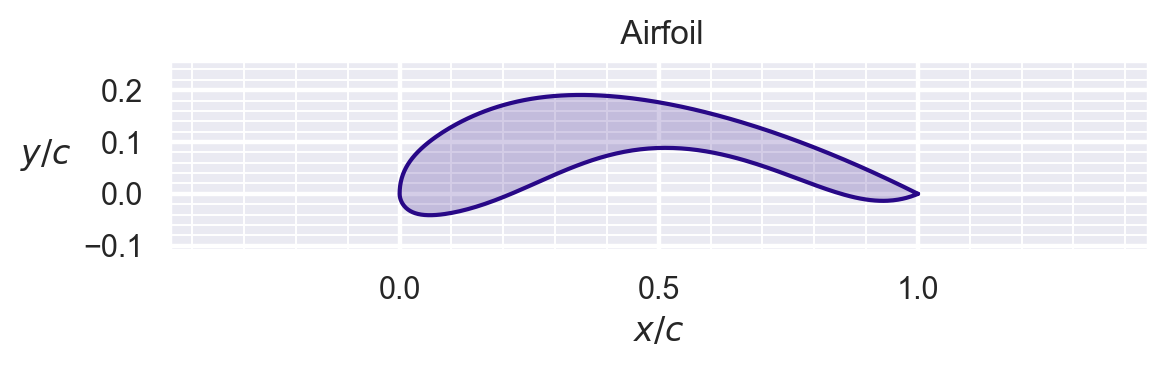

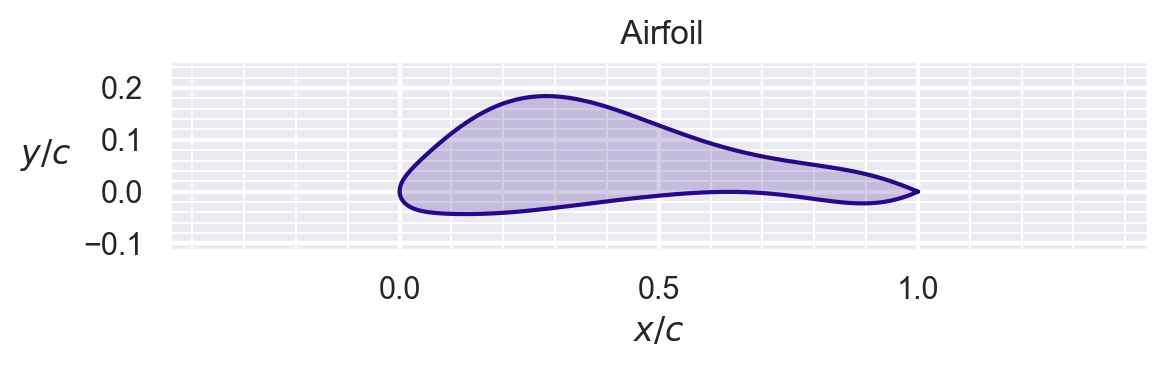

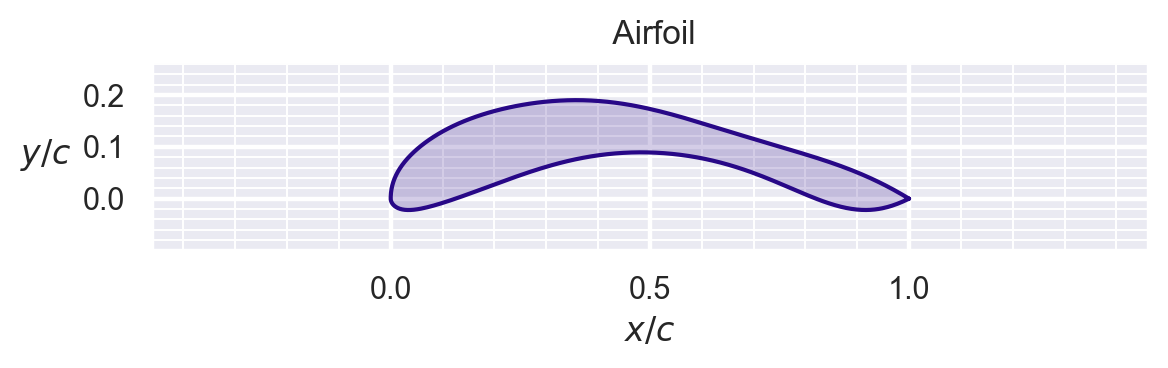

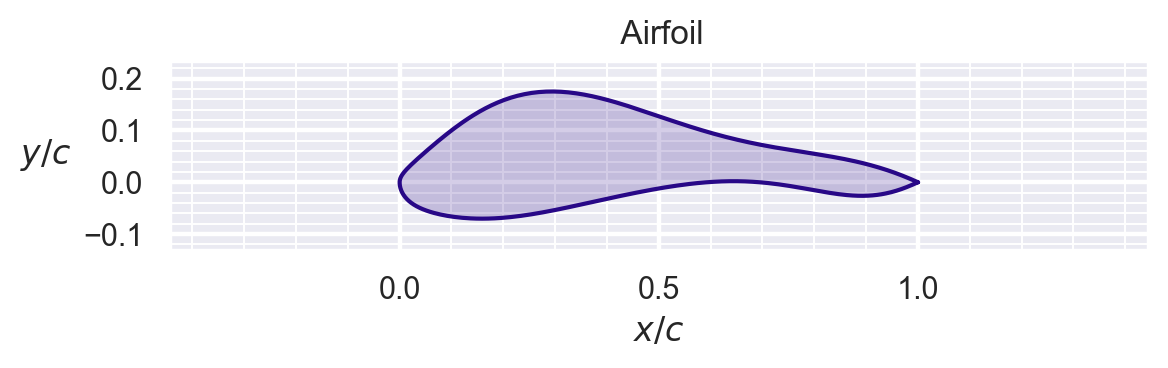

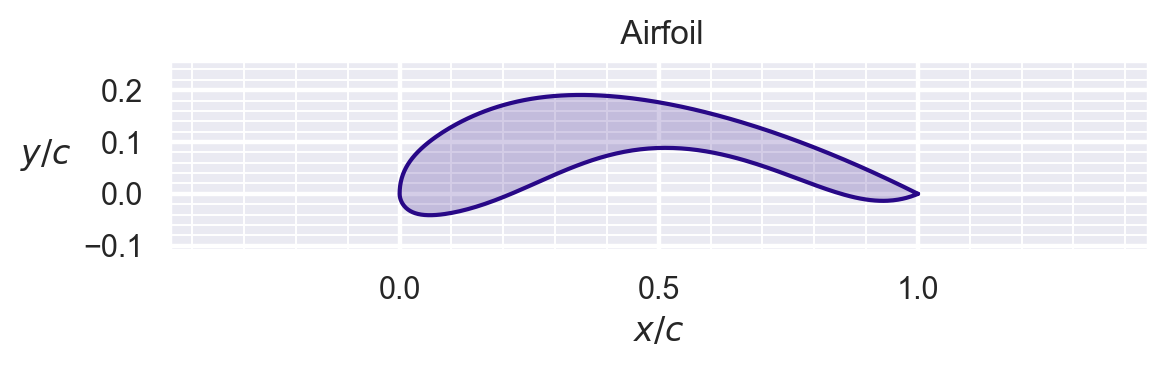

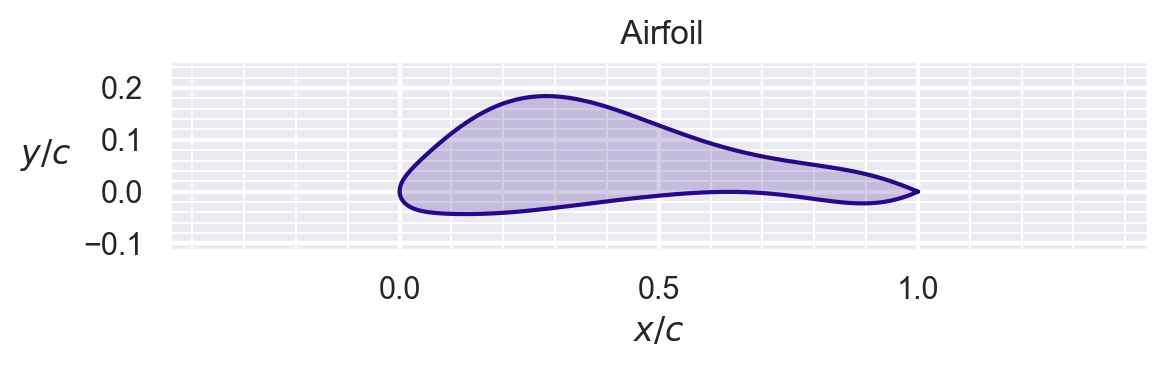

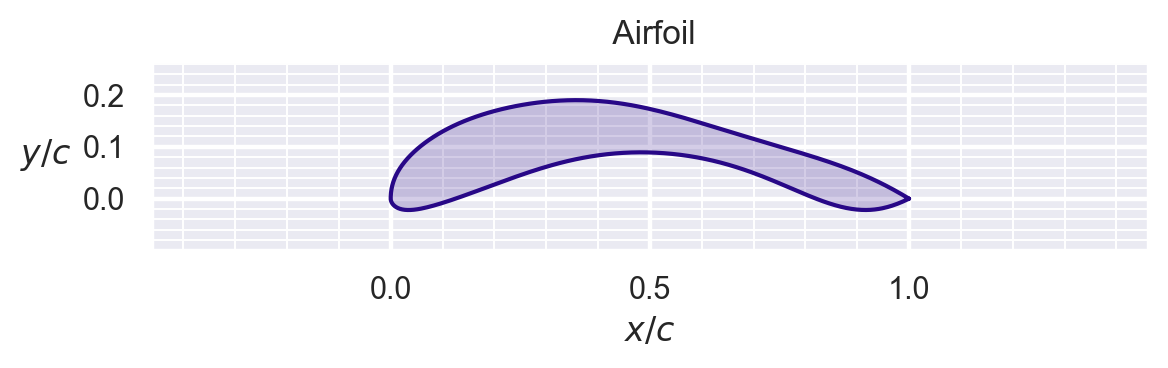

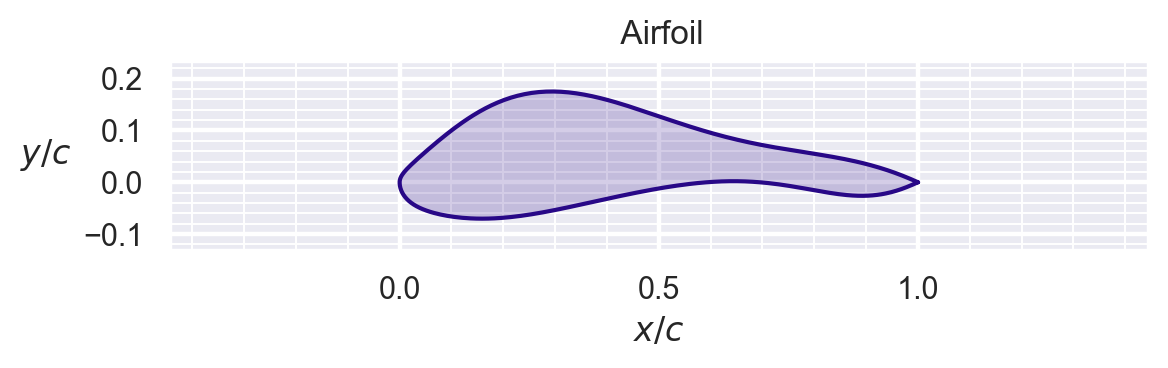

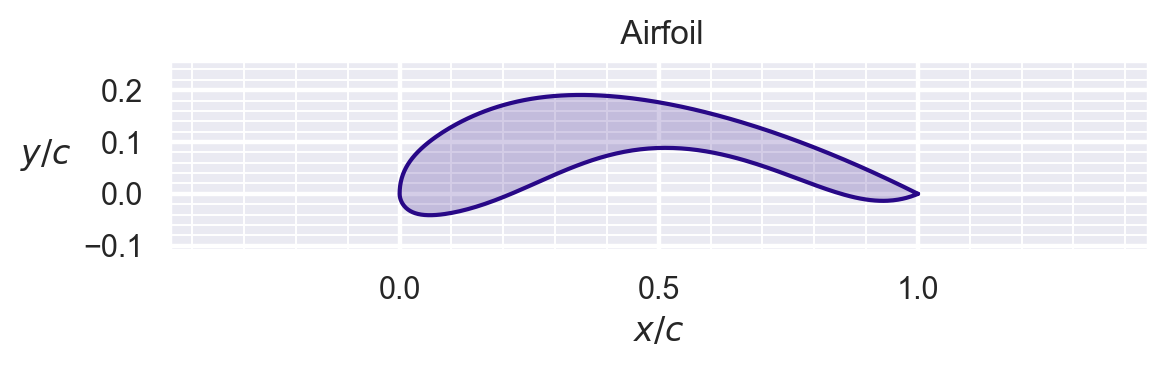

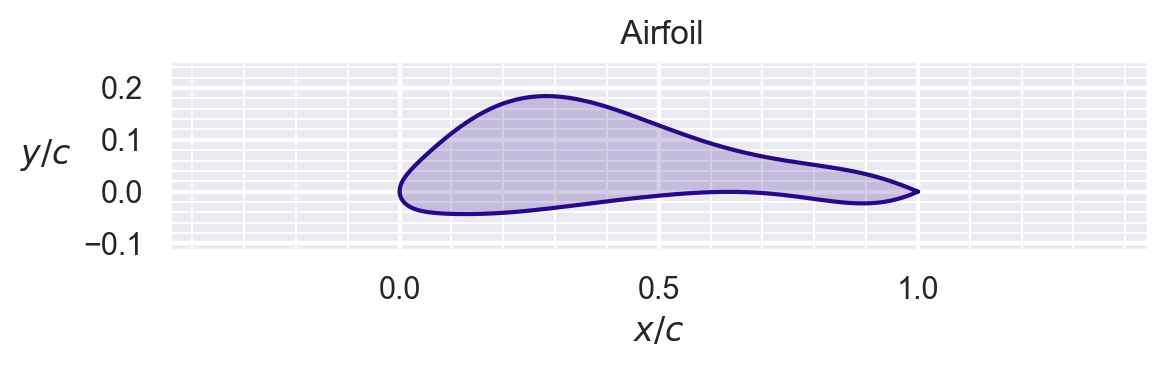

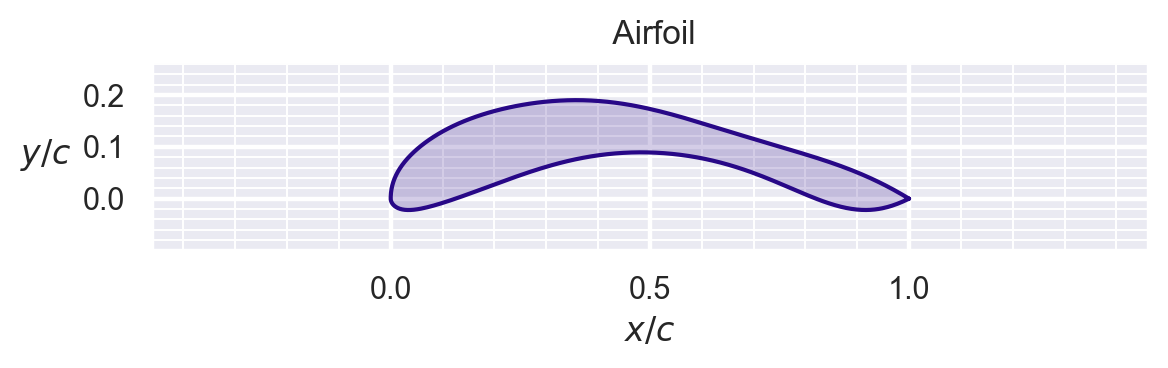

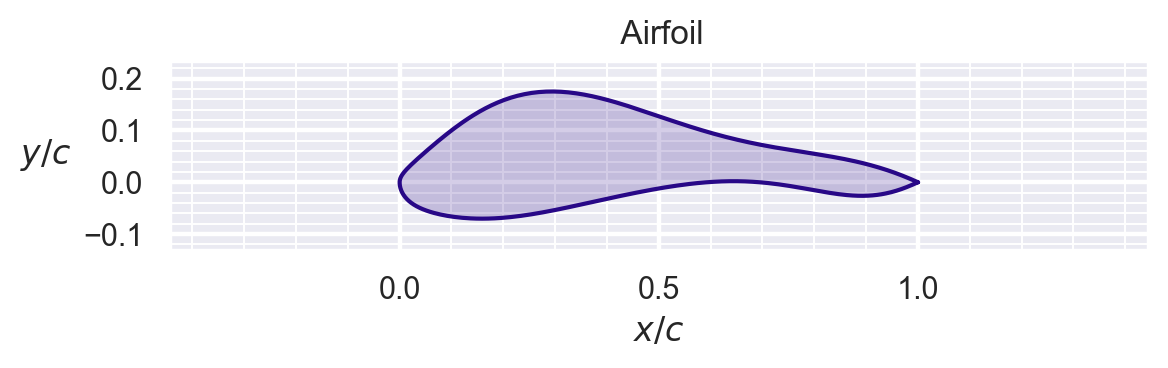

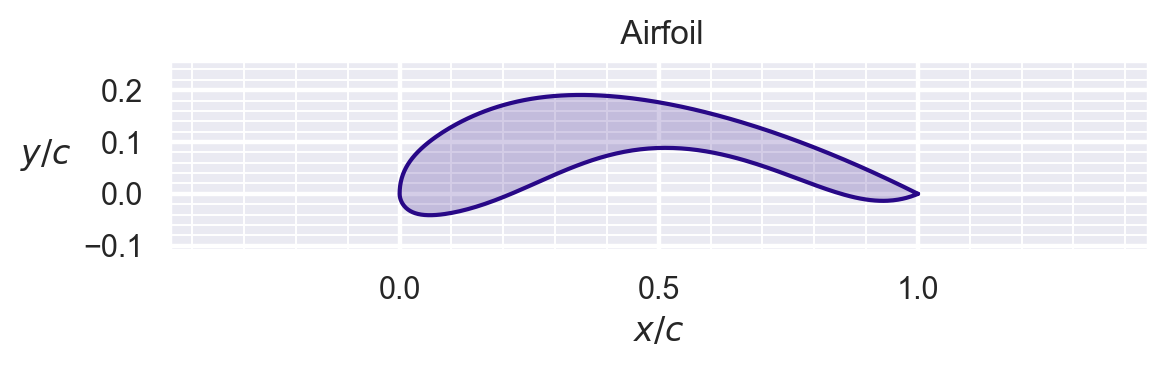

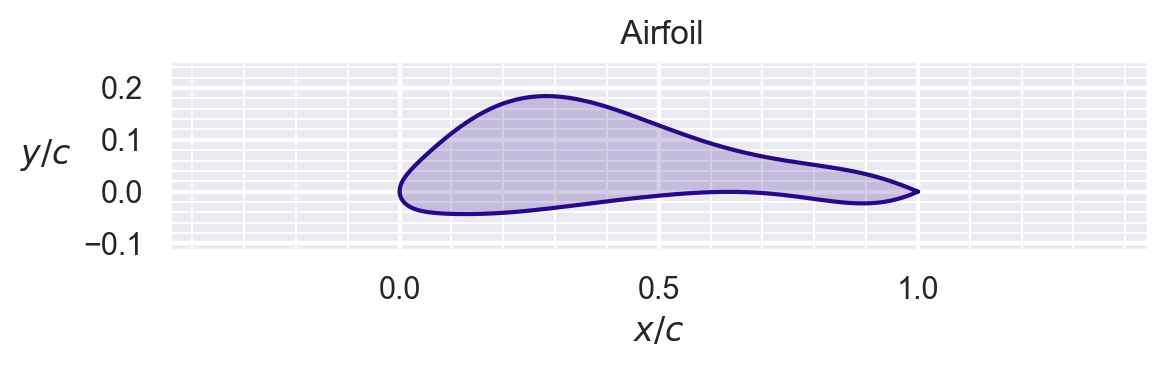

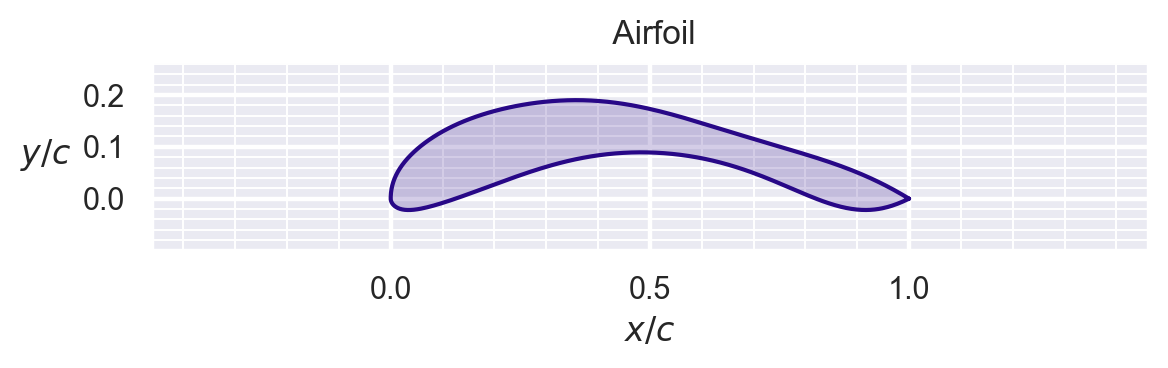

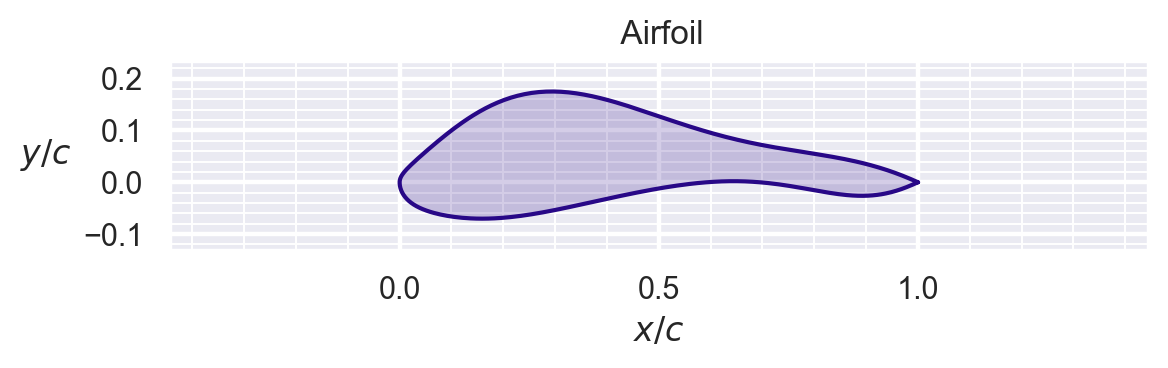

In [18]:

for i in range(20):
    action, _states = model.predict(obs, deterministic=True)

    obs, reward, done, _, info = env.step(action)
    
    #print(f"Step: {i}, Action: {action}, Reward: {reward}, Done: {done}, Info: {info}")
    #print(f"Obs: {obs['airfoil']}")
    env.render()

    if done:
        obs, _ = env.reset()

